In [11]:
from empca_residuals import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc12= empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4800
Lower limit (Enter for minimum): 4700
Found good limits
Data key: done
Done getting filter information


In [3]:
rc12.findResiduals()

In [4]:
rc13= empca_residuals('apogee','red_clump',maskFilter,ask=True)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? s
Upper limit (Enter for maximum): 4800
Lower limit (Enter for minimum): 4700
Found good limits
Data key: done
Done getting filter information


In [5]:
rc13.findResiduals()

In [6]:
Vdata12 = np.ma.var(rc12.residuals)
Vnoise12 = np.ma.mean(rc12.spectra_errs**2)
Vdata13 = np.ma.var(rc13.residuals)
Vnoise13 = np.ma.mean(rc13.spectra_errs**2)

In [28]:
print Vnoise12,Vdata12,Vnoise13,Vdata13

4.20438569725e-05 0.000114187610766 5.66395231076e-05 0.000107054801228


In [7]:
print 1-Vnoise12/Vdata12, 1-Vnoise13/Vdata13

0.631800186635 0.470929631761


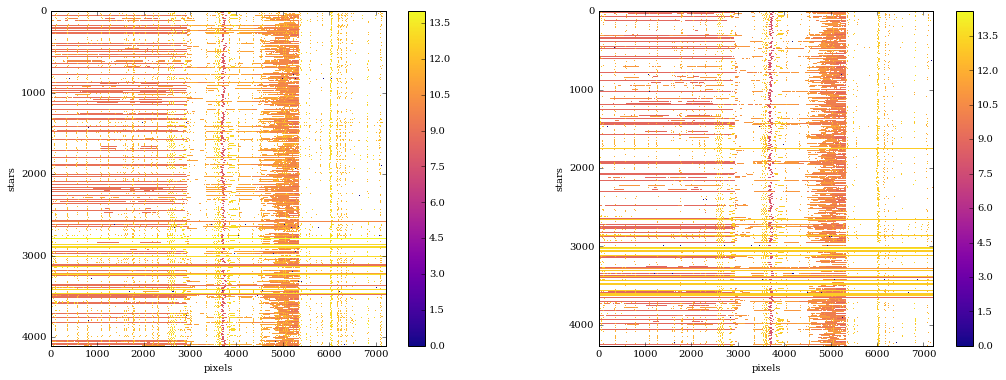

In [55]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(np.log2(rc12._bitmasks),cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(np.log2(rc13._bitmasks),cmap='plasma')

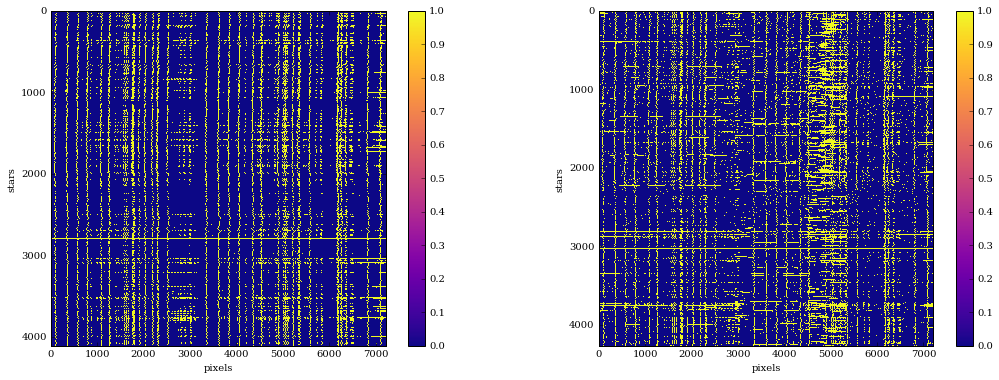

In [65]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12._maskHere,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13._maskHere,cmap='plasma')

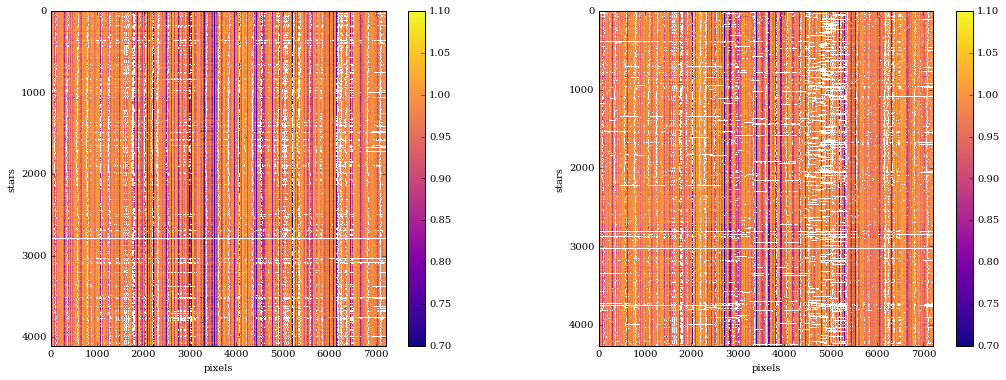

In [34]:
minlim = 0.7
maxlim = 1.1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra,vmin=minlim,vmax=maxlim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra,vmin=minlim,vmax=maxlim,cmap='plasma')

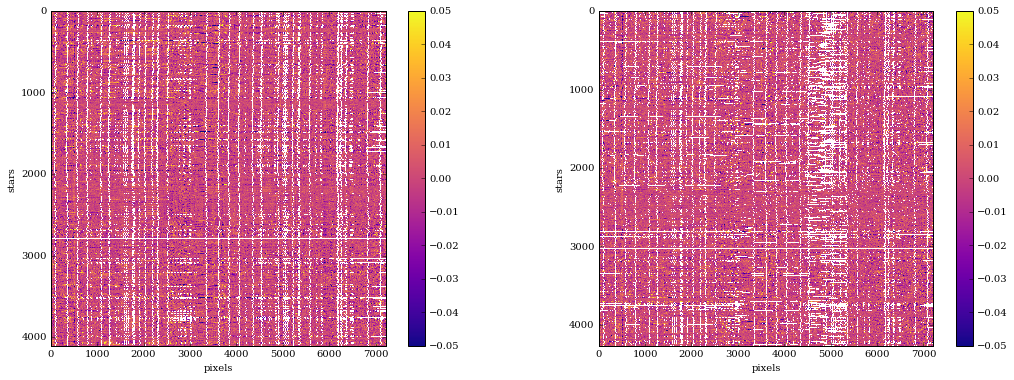

In [35]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.residuals,vmin=-lim,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.residuals,vmin=-lim,vmax=lim,cmap='plasma')

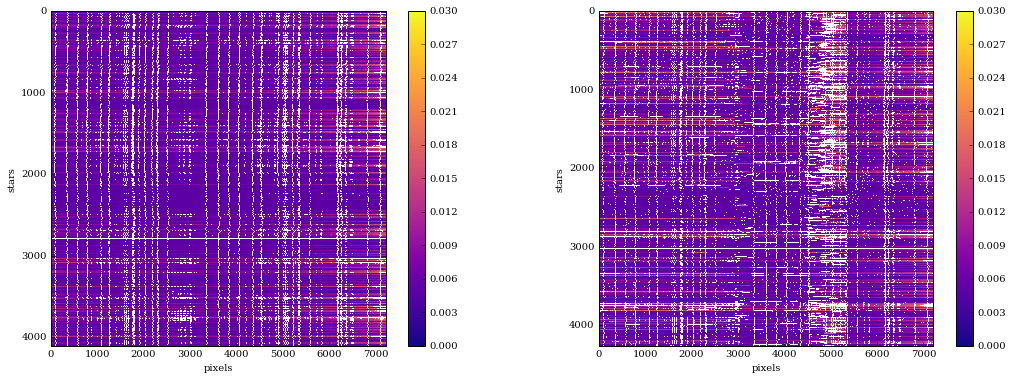

In [36]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs,vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs,vmin=0,vmax=lim,cmap='plasma')

In [51]:
crossover13 = (np.array([i for i in range(len(rc13.matchingData['APOGEE_ID'])) if rc13.matchingData['APOGEE_ID'][i] in rc12.matchingData['APOGEE_ID']]),)
crossover12 = (np.array([i for i in range(len(rc12.matchingData['APOGEE_ID'])) if rc12.matchingData['APOGEE_ID'][i] in rc13.matchingData['APOGEE_ID']]),)

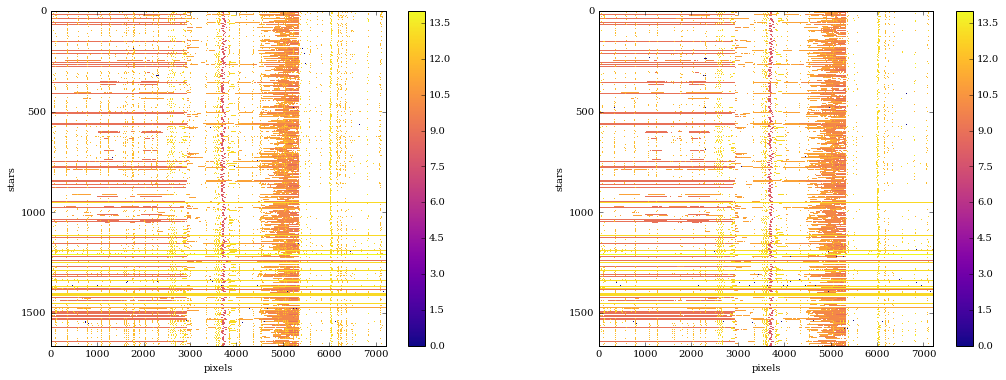

In [56]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(np.log2(rc12._bitmasks[crossover12]),cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(np.log2(rc13._bitmasks[crossover13]),cmap='plasma')

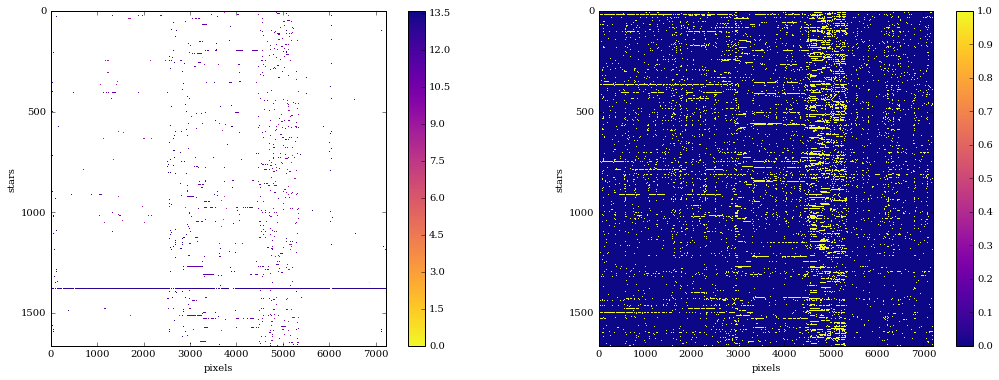

In [79]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
bmdiff=rc13._bitmasks[crossover13]-rc12._bitmasks[crossover12]
rc12.imshow(np.log2(bmdiff),cmap='plasma_r')
plt.subplot2grid((1,2),(0,1))
rc12.imshow(rc13._maskHere[crossover13]-rc12._maskHere[crossover12],cmap='plasma')

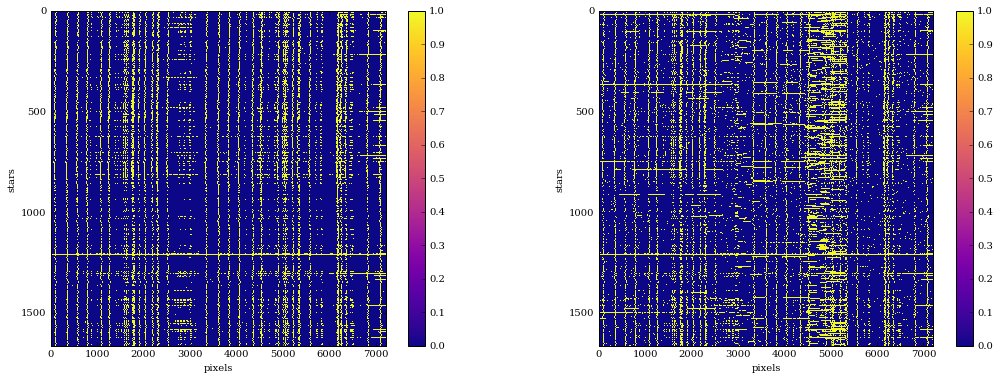

In [67]:
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12._maskHere[crossover12],cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13._maskHere[crossover13],cmap='plasma')

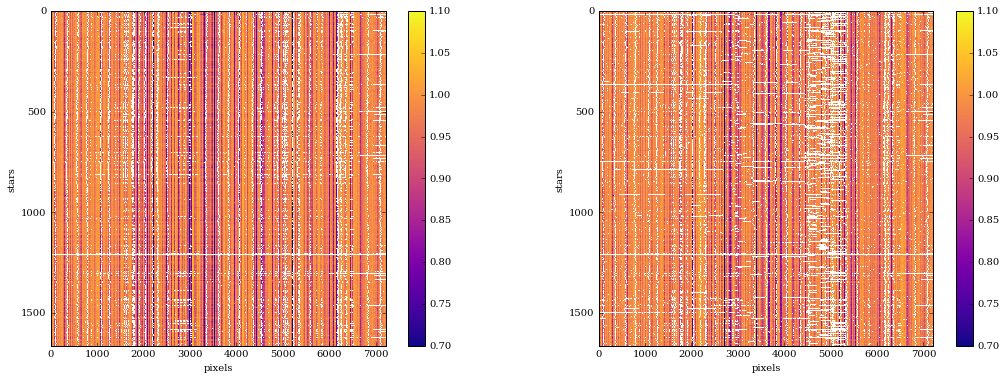

In [52]:
minlim = 0.7
maxlim = 1.1
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra[crossover12],vmin=minlim,vmax=maxlim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra[crossover13],vmin=minlim,vmax=maxlim,cmap='plasma')

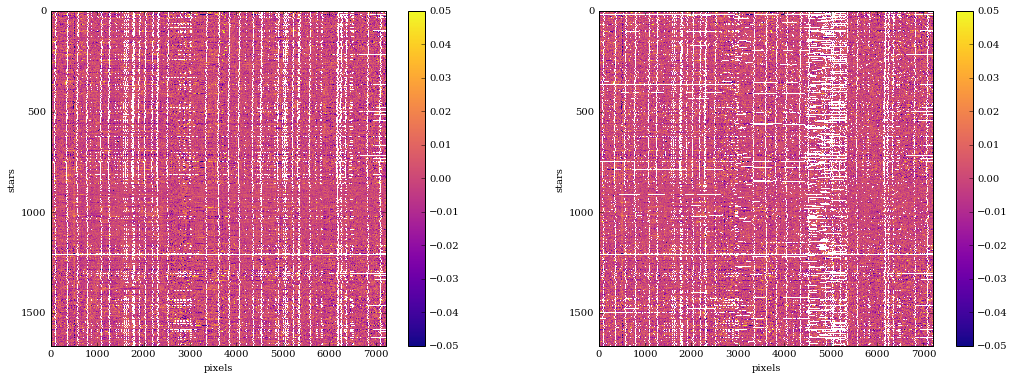

In [54]:
lim = 0.05
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.residuals[crossover12],vmin=-lim,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.residuals[crossover13],vmin=-lim,vmax=lim,cmap='plasma')

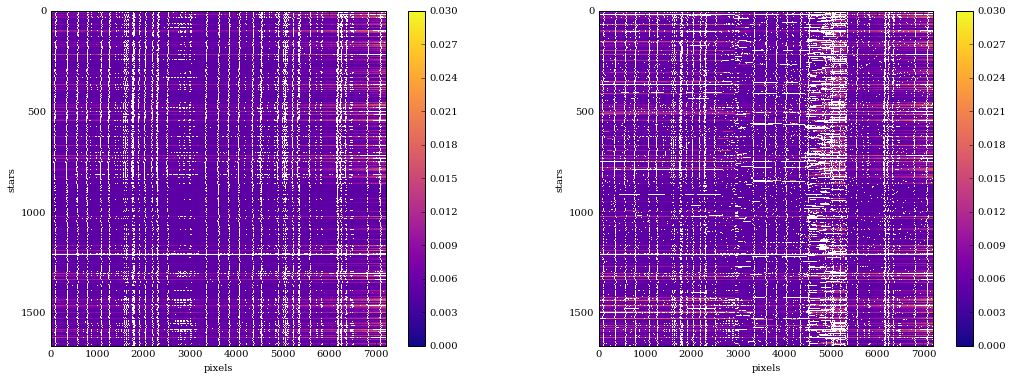

In [57]:
lim = 0.03
plt.figure(figsize=(18,6))
plt.subplot2grid((1,2),(0,0))
rc12.imshow(rc12.spectra_errs[crossover12],vmin=0,vmax=lim,cmap='plasma')
plt.subplot2grid((1,2),(0,1))
rc13.imshow(rc13.spectra_errs[crossover13],vmin=0,vmax=lim,cmap='plasma')

In [82]:
Vdata12cross = np.ma.var(rc12.residuals[crossover12])
Vnoise12cross = np.ma.mean(rc12.spectra_errs[crossover12]**2)
Vdata13cross = np.ma.var(rc13.residuals[crossover13])
Vnoise13cross = np.ma.mean(rc13.spectra_errs[crossover13]**2)

In [61]:
print Vnoise12cross,Vdata12cross,Vnoise13cross,Vdata13cross

4.0381418638e-05 9.84802648158e-05 5.0497496543e-05 9.36108985991e-05


In [63]:
print 1-Vnoise12cross/Vdata12cross, 1-Vnoise13cross/Vdata13cross

0.589954203378 0.460559643175
